In [166]:
import numpy as np
import scipy.stats as stats
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enhancing default style of Matplotlib and Seaborn
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [167]:
# Import the dataset
data = pd.read_csv("Apple Stock Prices (1981 to 2023).csv",encoding="latin-1")

# Initial exploration of data
initial_affichage = data.head()

In [168]:
initial_affichage

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [169]:
print(data.dtypes)
data.info()

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.2+ KB


In [170]:
# Vérifier les valeurs manquantes par colonne
missing_values = data.isnull().sum()
# Afficher uniquement les colonnes qui ont des valeurs manquantes
missing_columns = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :\n", missing_columns)

Colonnes avec des valeurs manquantes :
 Series([], dtype: int64)


In [171]:
detailed = data.describe(include='all')
detailed

,Date,Open,High,Low,Close,Adj Close,Volume
count,10608,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
unique,10608,NaN,NaN,NaN,NaN,NaN,NaN
top,02/01/1981,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,NaN,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,NaN,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,NaN,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,NaN,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,NaN,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08


In [172]:
#Convertir la colonne "Date" en format datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [173]:
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
print(data.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [174]:
detailed = data.describe(include='all')
detailed

,Date,Open,High,Low,Close,Adj Close,Volume
count,4186,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,2002-01-06 14:15:32.250358400,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
min,1981-01-04 00:00:00,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,1991-07-03 12:00:00,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,2002-01-06 00:00:00,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,2012-07-11 18:00:00,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,2023-12-01 00:00:00,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09
std,NaN,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08


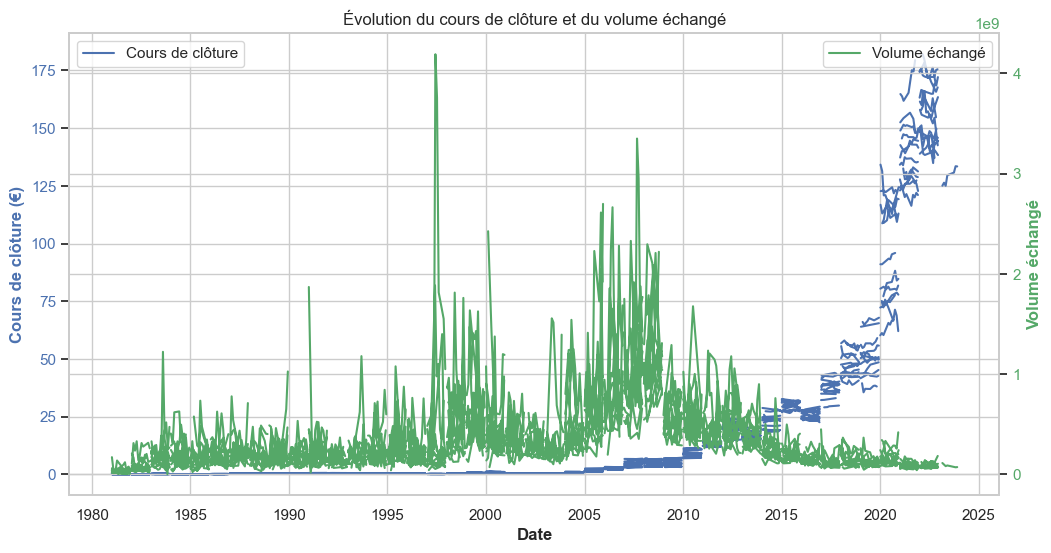

In [175]:
# Extraire l'année de la date
data['Year'] = data['Date'].dt.year

# Créer une figure et un axe principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer le cours de clôture
ax1.plot(data['Date'], data['Close'], color='b', label="Cours de clôture")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cours de clôture (€)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc="upper left")
ax1.grid(True)
# Ajouter un deuxième axe pour le volume échangé
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Volume'], color='g', label="Volume échangé")
ax2.set_ylabel("Volume échangé", color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc="upper right")

# Afficher le graphique
plt.title("Évolution du cours de clôture et du volume échangé")
plt.show()

In [176]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL 3510\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [177]:
import pandas as pd
import mplfinance as mpf
# Convertir la colonne 'Date' en index (mais ne pas la convertir en datetime)
data.set_index('Date', inplace=True)

# Créer un graphique en chandeliers
mpf.plot(data, type='candle', style='charles', title="Graphique en chandeliers", ylabel="Prix", volume=True)

ValueError: cannot convert float NaN to integer

In [178]:
#calculer les statistiques 
mean_values = data[['Volume', 'Open', 'High', 'Low', 'Adj Close']].mean()
median_values = data[['Volume', 'Open', 'High', 'Low', 'Adj Close']].median()
std_values = data[['Volume', 'Open', 'High', 'Low', 'Adj Close']].std()
print("\nMoyenne :\n", mean_values)
print("\nMédiane :\n", median_values)
print("\nÉcart-type :\n", std_values)


Moyenne :
 Volume       3.275098e+08
Open         1.668917e+01
High         1.687996e+01
Low          1.650082e+01
Adj Close    1.602735e+01
dtype: float64

Médiane :
 Volume       2.145976e+08
Open         4.888390e-01
High         4.955360e-01
Low          4.804465e-01
Adj Close    4.048505e-01
dtype: float64

Écart-type :
 Volume       3.378203e+08
Open         3.545052e+01
High         3.588285e+01
Low          3.503129e+01
Adj Close    3.515488e+01
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Définir 'Date' comme index
data.set_index('Date', inplace=True)

# Calculer la moyenne mobile simple (SMA) sur une période de 3 jours (vous pouvez changer cette période)
data['SMA_5'] = data['Close'].rolling(window=5).mean()

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Cours de Clôture', color='blue')
plt.plot(data['SMA_3'], label='Moyenne Mobile (5 jours)', color='red')
plt.title("Analyse des Cours de Clôture avec Moyenne Mobile")
plt.xlabel("Date")
plt.ylabel("Prix de Clôture")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Date'